In [1]:
# import the libraries
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# import the functions
from numpy import dot
import torch.nn as nn
import torch_geometric.utils as torch_utils
from sklearn import metrics
from numpy.linalg import norm
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score
from torch_geometric.utils import mask as Mask
from torch_geometric.utils import to_networkx
from torch_geometric.nn.models import Node2Vec
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE as tsne

import subprocess
import requests
import os
import pandas as pd
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import sys

In [17]:
data = pd.read_csv('/Users/mac/Documents/FILES/TUDelft/Q4/Machine Learning for Graph Data/project/aggregated.csv')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,95,96,204,205,206,207,208,209,210,211,212,213,234,235,684,685) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
data = data[data['aggregation_level'] == 2]

In [23]:
data = data[data['country_code'] == 'US']

In [24]:
data

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_vaccine_doses_administered_pfizer,cumulative_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen
0,US_AK_02013,2020-01-01,ChIJ7a-UgVuW_lYRjTetzbIWL48,Q504371,geoId/02013,US,United States of America,US,USA,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US_AK_02013,2020-01-02,ChIJ7a-UgVuW_lYRjTetzbIWL48,Q504371,geoId/02013,US,United States of America,US,USA,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US_AK_02013,2020-01-03,ChIJ7a-UgVuW_lYRjTetzbIWL48,Q504371,geoId/02013,US,United States of America,US,USA,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US_AK_02013,2020-01-04,ChIJ7a-UgVuW_lYRjTetzbIWL48,Q504371,geoId/02013,US,United States of America,US,USA,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US_AK_02013,2020-01-05,ChIJ7a-UgVuW_lYRjTetzbIWL48,Q504371,geoId/02013,US,United States of America,US,USA,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195970,US_WY_56045,2022-09-13,ChIJd4Rqhed3YocR7ubT5-HgoJg,Q115413,geoId/56045,US,United States of America,US,USA,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195971,US_WY_56045,2022-09-14,ChIJd4Rqhed3YocR7ubT5-HgoJg,Q115413,geoId/56045,US,United States of America,US,USA,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195972,US_WY_56045,2022-09-15,ChIJd4Rqhed3YocR7ubT5-HgoJg,Q115413,geoId/56045,US,United States of America,US,USA,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195973,US_WY_56045,2022-09-16,ChIJd4Rqhed3YocR7ubT5-HgoJg,Q115413,geoId/56045,US,United States of America,US,USA,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data = data.reset_index(drop=True)

In [ ]:
for location_key in data['location_key']:
    print(location_key)

In [27]:
for column in data.columns:
    print(column)


location_key
date
place_id
wikidata_id
datacommons_id
country_code
country_name
iso_3166_1_alpha_2
iso_3166_1_alpha_3
aggregation_level
new_confirmed
new_deceased
cumulative_confirmed
cumulative_deceased
cumulative_tested
new_persons_vaccinated
cumulative_persons_vaccinated
new_persons_fully_vaccinated
cumulative_persons_fully_vaccinated
new_vaccine_doses_administered
cumulative_vaccine_doses_administered
population
population_male
population_female
population_rural
population_urban
population_density
human_development_index
population_age_00_09
population_age_10_19
population_age_20_29
population_age_30_39
population_age_40_49
population_age_50_59
population_age_60_69
population_age_70_79
population_age_80_and_older
gdp_usd
gdp_per_capita_usd
openstreetmap_id
latitude
longitude
area_sq_km
smoking_prevalence
diabetes_prevalence
infant_mortality_rate
nurses_per_1000
physicians_per_1000
health_expenditure_usd
out_of_pocket_health_expenditure_usd
school_closing
workplace_closing
cancel_pu

In [52]:
features = ['average_temperature_celsius','stringency_index','new_confirmed','new_deceased','new_recovered',
            'new_persons_vaccinated_pfizer',
            'cumulative_persons_vaccinated_pfizer','new_persons_fully_vaccinated_pfizer',
            'cumulative_persons_fully_vaccinated_pfizer','new_persons_vaccinated_moderna',
            'cumulative_persons_vaccinated_moderna','new_persons_fully_vaccinated_moderna',
            'cumulative_persons_fully_vaccinated_moderna','new_persons_vaccinated_janssen',
            'cumulative_persons_vaccinated_janssen','new_persons_fully_vaccinated_janssen',
            'cumulative_persons_fully_vaccinated_janssen','new_persons_vaccinated_sinovac',
            'total_persons_vaccinated_sinovac','new_vaccine_doses_administered_pfizer',
            'cumulative_vaccine_doses_administered_pfizer','new_vaccine_doses_administered_moderna',
            'cumulative_vaccine_doses_administered_moderna','new_vaccine_doses_administered_janssen',
            'cumulative_vaccine_doses_administered_janssen']

locations = data['location_key']
dates = data['date']

In [53]:
data_selected = data.loc[:, features]

In [ ]:
nan_counts = data.isnull().sum()
nan_counts = nan_counts.sort_values()

In [64]:
top_40_columns = nan_counts.head(100).index.tolist()
for i, j in zip(top_40_columns, nan_counts):
    print(i, j)

location_key 0
subregion1_name 0
subregion1_code 0
subregion2_name 0
area_sq_km 0
population 0
aggregation_level 0
iso_3166_1_alpha_3 0
subregion2_code 0
country_name 0
date 0
iso_3166_1_alpha_2 0
wikidata_id 0
datacommons_id 0
country_code 0
openstreetmap_id 991
place_id 1982
longitude 2973
latitude 2973
average_temperature_celsius 13641
minimum_temperature_celsius 13641
rainfall_mm 13687
maximum_temperature_celsius 13705
relative_humidity 14681
dew_point 14681
population_age_80_and_older 79280
population_age_70_79 79280
population_age_60_69 79280
population_age_50_59 79280
population_age_30_39 79280
population_age_40_49 79280
population_age_00_09 79280
population_female 79280
population_male 79280
population_age_20_29 79280
population_age_10_19 79280
life_expectancy 203155
search_trends_pain 554071
cumulative_confirmed 702844
new_confirmed 706021
search_trends_infection 708181
cumulative_deceased 771293
new_deceased 774431
mobility_workplaces 847108
search_trends_allergy 1171055
sear

In [76]:
# Select features according to NaNs ranking
features_population_list = ['location_key',
                            'date',
                            'population',
                            'population_age_80_and_older', 
                            'population_age_70_79',
                            'population_age_60_69',
                            'population_age_50_59',
                            'population_age_30_39',
                            'population_age_40_49',
                            'population_age_00_09',
                            'population_female',
                            'population_male',
                            'population_age_20_29',
                            'population_age_10_19',
                            'life_expectancy']

features_weather_list = ['location_key',
                         'date',
                         'average_temperature_celsius', 
                         'minimum_temperature_celsius',
                         'rainfall_mm',
                         'maximum_temperature_celsius',
                         'relative_humidity',
                         'dew_point']

features_matter_list = ['location_key',
                        'date',
                        'cumulative_confirmed',
                        'new_confirmed',
                        'cumulative_deceased',
                        'new_deceased',
                        'cumulative_persons_fully_vaccinated',
                        'new_persons_fully_vaccinated']

In [93]:
# Extract features from the data
features_population  = data.loc[:, features_population_list]
features_weather     = data.loc[:, features_weather_list]
features_matter      = data.loc[:, features_matter_list]

In [94]:
locations_unique = locations.unique()
dates_unique = dates.unique()

In [108]:
for i in locations_unique:
    print(i)

US_AK_02013
US_AK_02016
US_AK_02020
US_AK_02050
US_AK_02060
US_AK_02068
US_AK_02070
US_AK_02090
US_AK_02100
US_AK_02105
US_AK_02110
US_AK_02122
US_AK_02130
US_AK_02150
US_AK_02158
US_AK_02164
US_AK_02170
US_AK_02180
US_AK_02185
US_AK_02188
US_AK_02195
US_AK_02198
US_AK_02220
US_AK_02230
US_AK_02240
US_AK_02261
US_AK_02275
US_AK_02282
US_AK_02290
US_AL_01001
US_AL_01003
US_AL_01005
US_AL_01007
US_AL_01009
US_AL_01011
US_AL_01013
US_AL_01015
US_AL_01017
US_AL_01019
US_AL_01021
US_AL_01023
US_AL_01025
US_AL_01027
US_AL_01029
US_AL_01031
US_AL_01033
US_AL_01035
US_AL_01037
US_AL_01039
US_AL_01041
US_AL_01043
US_AL_01045
US_AL_01047
US_AL_01049
US_AL_01051
US_AL_01053
US_AL_01055
US_AL_01057
US_AL_01059
US_AL_01061
US_AL_01063
US_AL_01065
US_AL_01067
US_AL_01069
US_AL_01071
US_AL_01073
US_AL_01075
US_AL_01077
US_AL_01079
US_AL_01081
US_AL_01083
US_AL_01085
US_AL_01087
US_AL_01089
US_AL_01091
US_AL_01093
US_AL_01095
US_AL_01097
US_AL_01099
US_AL_01101
US_AL_01103
US_AL_01105
US_AL_01107
US_A

In [128]:
population_array = features_population.to_numpy()
weather_array = features_weather.to_numpy()
matter_array = features_matter.to_numpy()

dates_length = len(dates_unique)
locations_length = len(locations_unique)

population_array_3d = population_array.reshape(locations_length, dates_length, -1).transpose(1, 0, 2)
population_array_3d = population_array_3d[:, :, 2:].astype(np.float32)

weather_array_3d = weather_array.reshape(locations_length, dates_length, -1).transpose(1, 0, 2)
weather_array_3d = weather_array_3d[:, :, 2:].astype(np.float32)

matter_array_3d = matter_array.reshape(locations_length, dates_length, -1).transpose(1, 0, 2)
matter_array_3d = matter_array_3d[:, :, 2:].astype(np.float32)

In [135]:
print(np.isnan(population_array_3d).sum()/population_array_3d.size)
print(np.isnan(weather_array_3d).sum()/weather_array_3d.size)
print(np.isnan(matter_array_3d).sum()/matter_array_3d.size)

0.02587954680977937
0.004382387221426951
0.32203792791453834


In [ ]:
population_array_3d = population_array_3d[:, :, 2:]
weather_array_3d = weather_array_3d[:, :, 2:]
matter_array_3d = matter_array_3d[:, :, 2:]

In [138]:
nan_counts = []

for i in range(len(matter_array_3d) - 30):
    nan_count = np.isnan(matter_array_3d[i:i+30]).sum()
    nan_counts.append(nan_count)

min_nan_index = np.argmin(nan_counts)
start_date = min_nan_index
nan_count = nan_counts[min_nan_index]

print("Start date:", start_date)
print("Number of NaNs:", nan_count)


Start date: 738
Number of NaNs: 5460


In [145]:
population_array_1month = population_array_3d[start_date:start_date+30, :, :]
weather_array_1month = weather_array_3d[start_date:start_date+30, :, :]
matter_array_1month = matter_array_3d[start_date:start_date+30, :, :]

In [150]:
np.save('population_array_1month.npy', population_array_1month)
np.save('weather_array_1month.npy', weather_array_1month)
np.save('matter_array_1month.npy', matter_array_1month)

## Reload data

In [205]:
population_array_1month = np.load('population_array_1month.npy')
weather_array_1month = np.load('weather_array_1month.npy')
matter_array_1month = np.load('matter_array_1month.npy')

In [197]:
# Check abnormal values
print('Population')
print(np.sum(np.isnan(population_array_1month))/population_array_1month.size)
print(np.sum(np.isinf(population_array_1month))/population_array_1month.size)

print('Weather')
print(np.sum(np.isnan(weather_array_1month))/weather_array_1month.size)
print(np.sum(np.isinf(weather_array_1month))/weather_array_1month.size)

print('Matter')
print(np.sum(np.isnan(matter_array_1month))/matter_array_1month.size)
print(np.sum(np.isinf(matter_array_1month))/matter_array_1month.size)

Population
0.02587954680977937
0.0
Weather
0.0013505598621877692
0.0
Matter
0.009405684754521963
0.0


In [177]:

def GraphGenerator(data):
    # for a single instant in time, build a graph with nodes as counties and edges as mobility between counties

    ''' 
    Daily Flow Data 
    There are 594160 links of which across each link the following is noted
    geoid_o - Unique identifier of the origin geographic unit (census tract, county, and state). Type: string.
    geoid_d - Unique identifier of the destination geographic unit (census tract, county, and state). Type: string.
    lat_o - Latitude of the geometric centroid of the origin unit. Type: float.
    lng_o - Longitude of the geometric centroid of the origin unit. Type: float.
    lat_d - Latitude of the geometric centroid of the destination unit. Type: float.
    lng_d - Longitude of the geometric centroid of the destination unit. Type: float.
    date - Date of the records. Type: string.
    visitor_flows - Estimated number of visitors between the two geographic units (from geoid_o to geoid_d). Type: float.
    pop_flows - Estimated population flows between the two geographic units (from geoid_o to geoid_d), inferred from visitor_flows. Type: float.
    '''
    def normalize(column):
        weights = data[column]
        max_weight = np.max(weights)
        min_weight = np.min(weights)
        weight_range = max_weight - min_weight
        normalized_edge_weights = (weights - min_weight) / weight_range

        # Set the values directly and return them
        data[column] = normalized_edge_weights
        return normalized_edge_weights

    def skew_towards_maximum(column, skew=10):
        weights = data[column]
        max_weight = np.max(weights)
        min_weight = np.min(weights)
        weight_range = max_weight - min_weight

        # Perform the skew
        shifted = weights - min_weight + 1  # Shift values to avoid log(0)
        log_values = np.log(shifted) / np.log(skew)

        # Scale the log-transformed values back to the original range
        skewed_weights = (log_values / np.max(log_values)) * weight_range + min_weight

        # Set the values directly and return them
        data[column] = skewed_weights
        return skewed_weights

    # initialize plot
    fig, ax = plt.subplots()

    # index by geoid of both target and origin, and merge them to we ensure we have a list of all nodes
    geoid_indexed_data = data[['geoid_o', 'lat_o', 'lng_o']].drop_duplicates(subset=['geoid_o']).set_index('geoid_o')
    geoid_d_indexed_data = data[['geoid_d', 'lat_d', 'lng_d']].drop_duplicates(subset=['geoid_d']).set_index('geoid_d').rename(index={'geoid_d': 'geoid_o'}).rename(index={'lat_d': 'lat_o'}).rename(index={'lng_d': 'lng_o'})

    geoid_indexed_data.update(geoid_d_indexed_data)

    # plot the nodes
    lngs = geoid_indexed_data['lng_o']
    lats = geoid_indexed_data['lat_o']
    ax.scatter(lngs, lats, color='red', s=0.1)

    # filter out selfloops
    data = data.query('geoid_o != geoid_d')

    #normalize population flows
    normalize('pop_flows')

    #normalize visitor flows
    weights = skew_towards_maximum('visitor_flows', skew=10)
    print(weights[:10])
    weights = normalize('visitor_flows')
    print(weights[:10])

    # only show data for visitor flows above some threshold
    #data = data.query('visitor_flows > 0.15')

    # keep k highest value edges for each from_node
    k=5
    data = data.sort_values('visitor_flows').groupby('geoid_o').head(k)

    #TODO:  keep edges such that the top 80% of population_flow per node is accounted for

    # plot the edges
    starts = [data['lng_o'], data['lat_o']]
    ends = [data['lng_d'], data['lat_d']]
    lines = np.array(list(zip(starts, ends))).T
    lines = LineCollection(lines, linewidths=.1*weights)
    ax.add_collection(lines)
    plt.show()

    # Get adjacency matrix for out graph
    #graph.remove_edges_from(nx.selfloop_edges(G_whole))
    graph = nx.from_pandas_edgelist(data, 'geoid_o', 'geoid_d', ['visitor_flows'])
    S = nx.adjacency_matrix(graph)

    # check if S is connected
    print(nx.is_connected(graph))

    def calculate_sparsity(graph):
        M = nx.to_scipy_sparse_array(graph)
        matrix_size = len(graph.nodes) ** 2
        sparsity = (matrix_size - M.nnz) / matrix_size
        return sparsity

    def draw_network(coo_matrix, node_size=10, width=0.1):
        graph = nx.from_numpy_array(coo_matrix.toarray())
        nx.draw_networkx(graph, \
            node_size=node_size, width=width, with_labels=False)
        print(f"Sparsity: {calculate_sparsity(graph)}")
        plt.show()

    # create timegraph
    timegraph_size=2
    St = np.zeros((timegraph_size,timegraph_size))
    for i in range(1, timegraph_size):
        St[i, i-1] = 1

    # Kronecker
    kronecker_product = sp.sparse.kron(St, S)
    # draw_network(kronecker_product)

    # Cartesian
    # From paper On Cartesian product of matrices by Deepak Sarma: Cartesian product of two square matrices Aand Bas A&B=A⊗J+J⊗B, where J is the all one matrix of appropriate order and ⊗is the Kronecker product
    cartesian_product = sp.sparse.kron(St, np.identity(S.shape[0])) + sp.sparse.kron(np.identity(St.shape[0]), S)
    # draw_network(cartesian_product)

    # Strong
    strong_product = kronecker_product + cartesian_product
    # draw_network(strong_product)

    return graph, S, kronecker_product, cartesian_product, strong_product




In [105]:
# # Download the daily flow data for a specific date range
# start_year = "2020"
# start_month = "01"
# start_day = "01"
# end_year = "2020"
# end_month = "01"
# end_day = "15"
# output_folder = "daily_flows"
# 
# # Construct the command
# # command = [
# #     "python", "download_daily_data.py",
# #     "--start_year", start_year,
# #     "--start_month", start_month,
# #     "--start_day", start_day,
# #     "--end_year", end_year,
# #     "--end_month", end_month,
# #     "--end_day", end_day,
# #     "--output_folder", output_folder,
# #     "--county"
# # ]
# 
# command = [
#     "python", "download_daily_data.py",
#     "--start_year", start_year,
#     "--start_month", start_month,
#     "--start_day", start_day,
#     "--output_folder", output_folder,
#     "--county"
# ]
# 
# # Run the command
# result = subprocess.run(command, capture_output=True, text=True)
# 
# # Print the result(if needed)
# print(result.stdout)

In [ ]:
filepath = '/Users/mac/Documents/FILES/TUDelft/Q4/Machine Learning for Graph Data/project/GraphML-main/daily_flows/county2county/daily_county2county_2020_01_01.csv'
flow = pd.read_csv(filepath)
_, adj_matrix, _, _, _ = GraphGenerator(flow)

In [182]:
G = nx.Graph(adj_matrix)
L = nx.laplacian_matrix(G).toarray()

In [199]:
sparsity = 1.0 - (adj_matrix.count_nonzero() / (adj_matrix.shape[0] * adj_matrix.shape[1]))
sparsity

0.9969052266210768

In [206]:
population_array_1month = population_array_1month[:, 0:adj_matrix.shape[0], :]
weather_array_1month = weather_array_1month[:, 0:adj_matrix.shape[0], :]
matter_array_1month = matter_array_1month[:, 0:adj_matrix.shape[0], :]

In [207]:
confirmed = matter_array_1month[:, :, 3]


In [208]:
from sklearn.preprocessing import MinMaxScaler
num_dates, num_locs, num_feas = population_array_1month.shape
scaler1 = MinMaxScaler()
population_array_1month_reshaped = population_array_1month.reshape(-1, num_feas)
population_array_1month_normalized = scaler1.fit_transform(population_array_1month_reshaped)
population_array_1month_normalized = population_array_1month_normalized.reshape(num_dates, num_locs, num_feas)

num_dates, num_locs, num_feas = weather_array_1month.shape
scaler2 = MinMaxScaler()
weather_array_1month_reshaped = weather_array_1month.reshape(-1, num_feas)
weather_array_1month_normalized = scaler1.fit_transform(weather_array_1month_reshaped)
weather_array_1month_normalized = weather_array_1month_normalized.reshape(num_dates, num_locs, num_feas)

num_dates, num_locs, num_feas = matter_array_1month.shape
scaler3 = MinMaxScaler()
matter_array_1month_reshaped = matter_array_1month.reshape(-1, num_feas)
matter_array_1month_normalized = scaler1.fit_transform(matter_array_1month_reshaped)
matter_array_1month_normalized = matter_array_1month_normalized.reshape(num_dates, num_locs, num_feas)

In [209]:
matter_array_1month_normalized[:, :, 3] = confirmed

In [159]:
from sklearn.metrics import mean_squared_error

def compute_rnmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rnmse = rmse / np.sqrt(np.mean(np.square(y_true)))
    return rnmse

def compute_tikhonov_form_solution(L, P, y, alpha):
    Pt = P.T @ P
    x_hat = np.linalg.pinv(Pt + alpha * L) @ Pt @ y
    return x_hat

In [210]:
alpha = 0.1

num_dates, num_locs, num_feas = population_array_1month.shape

for date in range(num_dates):
    print("Date:", date)
    for fea in range(num_feas):
        print('Feature:', fea)
        feature = population_array_1month[date, :, fea]
        if np.isnan(feature).sum() != num_locs:
            P = np.eye(num_locs)
            for i in range(num_locs):
                if np.isnan(feature[i]):
                    feature[i] = 0
                    P[i, i] = 0

            y = P @ feature
            population_array_1month[date, :, fea] = compute_tikhonov_form_solution(L, P, y, alpha)



Date: 0
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Feature: 6
Feature: 7
Feature: 8
Feature: 9
Feature: 10
Feature: 11
Feature: 12
Date: 1
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Feature: 6
Feature: 7
Feature: 8
Feature: 9
Feature: 10
Feature: 11
Feature: 12
Date: 2
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Feature: 6
Feature: 7
Feature: 8
Feature: 9
Feature: 10
Feature: 11
Feature: 12
Date: 3
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Feature: 6
Feature: 7
Feature: 8
Feature: 9
Feature: 10
Feature: 11
Feature: 12
Date: 4
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Feature: 6
Feature: 7
Feature: 8
Feature: 9
Feature: 10
Feature: 11
Feature: 12
Date: 5
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Feature: 6
Feature: 7
Feature: 8
Feature: 9
Feature: 10
Feature: 11
Feature: 12
Date: 6
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Fe

In [211]:
alpha = 0.1

num_dates, num_locs, num_feas = weather_array_1month.shape

for date in range(num_dates):
    print("Date:", date)
    for fea in range(num_feas):
        print('Feature:', fea)
        feature = weather_array_1month[date, :, fea]
        if np.isnan(feature).sum() != num_locs:
            P = np.eye(num_locs)
            for i in range(num_locs):
                if np.isnan(feature[i]):
                    feature[i] = 0
                    P[i, i] = 0

            y = P @ feature
            weather_array_1month[date, :, fea] = compute_tikhonov_form_solution(L, P, y, alpha)

Date: 0
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 1
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 2
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 3
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 4
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 5
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 6
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 7
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 8
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 9
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 10
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 11
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 12
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 13
Feature: 0
Feature: 1
Feat

In [212]:
alpha = 0.1

num_dates, num_locs, num_feas = matter_array_1month.shape

for date in range(num_dates):
    print("Date:", date)
    for fea in range(num_feas):
        print('Feature:', fea)
        feature = matter_array_1month[date, :, fea]
        if np.isnan(feature).sum() != num_locs:
            P = np.eye(num_locs)
            for i in range(num_locs):
                if np.isnan(feature[i]):
                    feature[i] = 0
                    P[i, i] = 0

            y = P @ feature
            matter_array_1month[date, :, fea] = compute_tikhonov_form_solution(L, P, y, alpha)

Date: 0
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 1
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 2
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 3
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 4
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 5
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 6
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 7
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 8
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 9
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 10
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 11
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 12
Feature: 0
Feature: 1
Feature: 2
Feature: 3
Feature: 4
Feature: 5
Date: 13
Feature: 0
Feature: 1
Feat

## Save the recovered data

In [218]:
np.save('population_array_1month.npy', population_array_1month)
np.save('weather_array_1month.npy', weather_array_1month)
np.save('matter_array_1month.npy', matter_array_1month)

In [264]:
population_array_1month = np.load('population_array_1month.npy')
weather_array_1month = np.load('weather_array_1month.npy')
matter_array_1month = np.load('matter_array_1month.npy')
matter_array_1month.shape

(30, 3218, 6)

In [250]:
from sklearn.decomposition import PCA

(30, 3218, 5)

In [265]:
num_dates, num_locs, num_feas = population_array_1month.shape
scaler1 = MinMaxScaler(feature_range=(0, 1))
population_array_1month_reshaped = population_array_1month.reshape(-1, num_feas)
population_array_1month_normalized = scaler1.fit_transform(population_array_1month_reshaped)
population_array_1month_normalized = population_array_1month_normalized.reshape(num_dates, num_locs, num_feas)

num_dates, num_locs, num_feas = weather_array_1month.shape
scaler2 = MinMaxScaler(feature_range=(0, 1))
weather_array_1month_reshaped = weather_array_1month.reshape(-1, num_feas)
weather_array_1month_normalized = scaler1.fit_transform(weather_array_1month_reshaped)
weather_array_1month_normalized = weather_array_1month_normalized.reshape(num_dates, num_locs, num_feas)

num_dates, num_locs, num_feas = matter_array_1month.shape
scaler3 = MinMaxScaler(feature_range=(0, 1))
matter_array_1month_reshaped = matter_array_1month.reshape(-1, num_feas)
matter_array_1month_normalized = scaler1.fit_transform(matter_array_1month_reshaped)
matter_array_1month_normalized = matter_array_1month_normalized.reshape(num_dates, num_locs, num_feas)

Unnormalized
Date: 0
Date: 1
Date: 2
Date: 3
Date: 4
Date: 5
Date: 6
Date: 7
Date: 8
Date: 9
Date: 10
Date: 11
Date: 12
Date: 13
Date: 14
Date: 15
Date: 16
Date: 17
Date: 18
Date: 19
Date: 20
Date: 21
Date: 22
Date: 23
Date: 24
Date: 25
Date: 26
Date: 27
Date: 28
Date: 29
Normalized
Date: 0
Date: 1
Date: 2
Date: 3
Date: 4
Date: 5
Date: 6
Date: 7
Date: 8
Date: 9
Date: 10
Date: 11
Date: 12
Date: 13
Date: 14
Date: 15
Date: 16
Date: 17
Date: 18
Date: 19
Date: 20
Date: 21
Date: 22
Date: 23
Date: 24
Date: 25
Date: 26
Date: 27
Date: 28
Date: 29


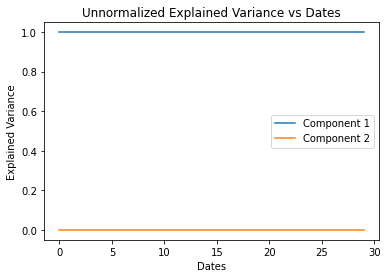

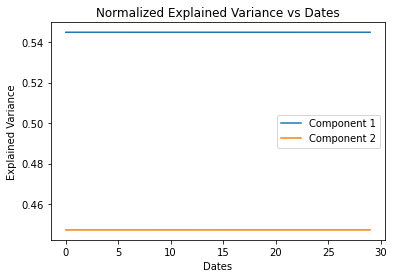

In [272]:
n_components = 2

num_dates, num_locs, num_feas = population_array_1month.shape

population = np.zeros((num_dates, num_locs, n_components))

explained_variance_population = np.zeros((num_dates, n_components))

print('Unnormalized')
for date in range(num_dates):
    print("Date:", date)
    tmp = population_array_1month[date, :, :]
    pca = PCA(n_components=n_components)
    pca.fit(tmp)
    pcas = pca.transform(tmp)
    explained_variance_population[date, :] = pca.explained_variance_ratio_
    population[date, :, :] = pcas


num_dates, num_locs, num_feas = population_array_1month_normalized.shape

population_normalized = np.zeros((num_dates, num_locs, n_components))

explained_variance_population_normalized = np.zeros((num_dates, n_components))

print('Normalized')
for date in range(num_dates):
    print("Date:", date)
    tmp = population_array_1month_normalized[date, :, :]
    pca = PCA(n_components=n_components)
    pca.fit(tmp)
    pcas = pca.transform(tmp)
    explained_variance_population_normalized[date, :] = pca.explained_variance_ratio_
    population_normalized[date, :, :] = pcas
    
# Plot the explained variance
import matplotlib.pyplot as plt

plt.plot(explained_variance_population[:, 0], label='Component 1')
plt.plot(explained_variance_population[:, 1], label='Component 2')
plt.xlabel('Dates')
plt.ylabel('Explained Variance')
plt.title('Unnormalized Explained Variance vs Dates')
plt.legend()
plt.show()

plt.plot(explained_variance_population_normalized[:, 0], label='Component 1')
plt.plot(explained_variance_population_normalized[:, 1], label='Component 2')
plt.xlabel('Dates')
plt.ylabel('Explained Variance')
plt.title('Normalized Explained Variance vs Dates')
plt.legend()
plt.show()


Unnormalized
Date: 0
Date: 1
Date: 2
Date: 3
Date: 4
Date: 5
Date: 6
Date: 7
Date: 8
Date: 9
Date: 10
Date: 11
Date: 12
Date: 13
Date: 14
Date: 15
Date: 16
Date: 17
Date: 18
Date: 19
Date: 20
Date: 21
Date: 22
Date: 23
Date: 24
Date: 25
Date: 26
Date: 27
Date: 28
Date: 29
Normalized
Date: 0
Date: 1
Date: 2
Date: 3
Date: 4
Date: 5
Date: 6
Date: 7
Date: 8
Date: 9
Date: 10
Date: 11
Date: 12
Date: 13
Date: 14
Date: 15
Date: 16
Date: 17
Date: 18
Date: 19
Date: 20
Date: 21
Date: 22
Date: 23
Date: 24
Date: 25
Date: 26
Date: 27
Date: 28
Date: 29


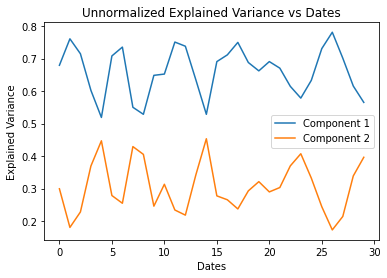

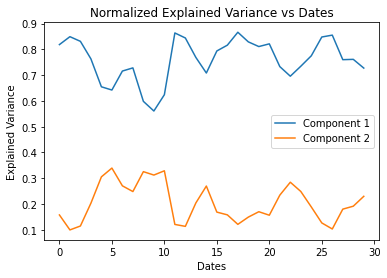

In [273]:
n_components = 2

num_dates, num_locs, num_feas = weather_array_1month.shape

weather = np.zeros((num_dates, num_locs, n_components))

explained_variance_weather = np.zeros((num_dates, n_components))

print('Unnormalized')
for date in range(num_dates):
    print("Date:", date)
    tmp = weather_array_1month[date, :, :]
    pca = PCA(n_components=n_components)
    pca.fit(tmp)
    pcas = pca.transform(tmp)
    explained_variance_weather[date, :] = pca.explained_variance_ratio_
    weather[date, :, :] = pcas


weather_normalized = np.zeros((num_dates, num_locs, n_components))

explained_variance_weather_normalized = np.zeros((num_dates, n_components))

print('Normalized')
for date in range(num_dates):
    print("Date:", date)
    tmp = weather_array_1month_normalized[date, :, :]
    pca = PCA(n_components=n_components)
    pca.fit(tmp)
    pcas = pca.transform(tmp)
    explained_variance_weather_normalized[date, :] = pca.explained_variance_ratio_
    weather_normalized[date, :, :] = pcas


plt.plot(explained_variance_weather[:, 0], label='Component 1')
plt.plot(explained_variance_weather[:, 1], label='Component 2')
plt.xlabel('Dates')
plt.ylabel('Explained Variance')
plt.title('Unnormalized Explained Variance vs Dates')
plt.legend()
plt.show()

plt.plot(explained_variance_weather_normalized[:, 0], label='Component 1')
plt.plot(explained_variance_weather_normalized[:, 1], label='Component 2')
plt.xlabel('Dates')
plt.ylabel('Explained Variance')
plt.title('Normalized Explained Variance vs Dates')
plt.legend()
plt.show()
    

In [270]:
confirmed = matter_array_1month[:, :, 3]
confirmed_normalized = matter_array_1month_normalized[:, :, 3]

matter_array_1month = np.delete(matter_array_1month, 3, axis=2)
matter_array_1month_normalized = np.delete(matter_array_1month_normalized, 3, axis=2)

In [283]:
X_unnormalized = np.concatenate((population, weather, matter_array_1month), axis=2)
X_normalized = np.concatenate((population_normalized, weather_normalized, matter_array_1month_normalized), axis=2)

confirmed_unnormalized = confirmed

## Save the final data

In [285]:
import os

# Create the folder if it doesn't exist
folder_name = "final_data"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

    if not os.path.exists('final_data'):
        os.makedirs('final_data')

np.save('final_data/X_unnormalized.npy', X_unnormalized)
np.save('final_data/X_normalized.npy', X_normalized)
np.save('final_data/confirmed_unnormalized.npy', confirmed_unnormalized)
np.save('final_data/confirmed_normalized.npy', confirmed_normalized)

